# Titanic - Machine Learning from Disaster
This is my first submission in Kaggle so if you find any mistakes, corrections, or suggestions, feel free to mention them.

## Initial Setup

### Import Statements

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
# Scoring Metric
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score
# Encoding
from sklearn.preprocessing import LabelEncoder
# Splitting Dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

### Import the Datasets

In [2]:
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")

### Stylistics

In [3]:
%matplotlib inline
plt.style.use("dark_background")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.set_option("precision", 2)

### Files

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./datasets/test.csv
./datasets/gender_submission.csv
./datasets/train.csv


### Exploring the Dataset

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print("Number of Rows: {}".format(train_data.shape[0]))
print("Number of Colums: {}".format(train_data.shape[1]))
print("Column Names: {}".format(train_data.columns.values))

Number of Rows: 891
Number of Colums: 12
Column Names: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Some of the insights that we can get from these cells are:
1. `PassengerId` gives a natural ordering to the dataset.
2. We have 891 rows and 12 columns. `Name`, `Ticket` and `Cabin` are no important to us and should be dropped.
3. The Columns have correct dtype except `Sex` that can be turned into a boolean number.
4. We have 7 Numeric Columns and 5 Strings
4. We have missing values.

## Data Cleaning

### Remove Unnecessary Columns 

Here we are removing `Name`, `Ticket` and `Cabin` since these columns are not important in our analysis.

In [9]:
data_cleaner = [train_data, test_data]
data_name = ["train_data", "test_data"]
remove_cols = ["Name", "Ticket", "Cabin"]

for idx, dataset in enumerate(data_cleaner):
    print(data_name[idx])
    print("Number of Colums (BEFORE): {}".format(dataset.shape[1]))
    
    dataset.drop(remove_cols, axis=1, inplace=True)
    
    print("Number of Colums (AFTER): {}\n".format(dataset.shape[1]))
    
train_data.drop("PassengerId", axis=1, inplace=True)

train_data
Number of Colums (BEFORE): 12
Number of Colums (AFTER): 9

test_data
Number of Colums (BEFORE): 11
Number of Colums (AFTER): 8



We can confirm that we have removed the columns by printing how many columns we have.
> The test data are 1 column less since it doesn't have the `Survived` column unlike the training data for later evaluation.

### Missing Values

In [10]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

Just like `train_data`, `test_data` also has some missing data on age.

Since `Age` has some significant values that are missing and we have no way to identify the  age of the passenger based on the columns presented, one solution that I can think of is fill this with the mean values of the `Age` column. Let's do just that.

In [12]:
for dataset in data_cleaner:
    dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)
    
    dataset["Fare"].fillna(dataset["Fare"].median(), inplace=True)
    
    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace=True)

In [13]:
print(train_data.isnull().sum())
print("#" + "-"*20 + "#")
print(test_data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
#--------------------#
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


As we can see, there are no mising values in any of the columns.

### Removing  Outliers
In order for our dataset to be prepared to be analyzed by our chosen model, we need to remove outliers that will draw our conclusion far away from the truth. To do this, we will consider a value an outlier if it falls over 3 standard deviation away from the mean.

In [14]:
features = ["Fare", "Age", "SibSp", "Parch"] # Columns we are interested in
before_removal = train_data.shape[0]
for feature in features:
    min_ = train_data[feature].mean() - (3 * train_data[feature].std())
    max_ = train_data[feature].mean() + (3 * train_data[feature].std())
    
    train_data = train_data[train_data[feature] >= min_]
    train_data = train_data[train_data[feature] <= max_]
    print("Number of Remaining Observations: {} -> {}\n".format(feature, train_data[feature].shape))
    
print("Number of Observation Removed: {}".format(before_removal - train_data.shape[0]))

Number of Remaining Observations: Fare -> (871,)

Number of Remaining Observations: Age -> (864,)

Number of Remaining Observations: SibSp -> (834,)

Number of Remaining Observations: Parch -> (820,)

Number of Observation Removed: 71


## Convert Formats
Since we have String columns, our Machine Learning model won't be able to process data that are not numbers. A solution might be to use `LabelEncoder()` from scikit-learn to transform the text data into numeric data.

In [15]:
label = LabelEncoder()

train_data["Sex_Encoded"] = label.fit_transform(train_data["Sex"])
train_data["Embarked_Encoded"] = label.fit_transform(train_data["Embarked"])

test_data["Sex_Encoded"] = label.fit_transform(test_data["Sex"])
test_data["Embarked_Encoded"] = label.fit_transform(test_data["Embarked"])
    
# Pretty names for charts
pretty_titanic = ['Sex','Pclass', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare']
# For Calculations
calc_titanic = ['Sex_Encoded','Embarked_Encoded', 'SibSp', 'Parch', 'Age', 'Fare']

### Train Data

#### OneHotEncoding()

In [16]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ["Sex", "Embarked"])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# # np.array(ct.fit_transform(X))[:, :].shape

##### Turn the PassengerId Column into int.dtype

In [17]:
# X = pd.DataFrame(X)
# X[5] = X[5].astype(int)

#### LabelEncoder()

In [18]:
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()

# features = ["Sex", "Embarked"]

# for feature in features:
#     X[feature] = enc.fit_transform(X[feature])
# X

#### Dummy Variables

In [19]:
# X = pd.get_dummies(X, columns=["Sex", "Embarked"])
# X = X.values

### Test Data

#### OneHotEncoder()

In [20]:
# test_data = np.array(ct.transform(test_data.drop("PassengerId", axis=1)))

##### Turn the PassengerId Column into int.dtype

In [21]:
# test_data = pd.DataFrame(test_data)
# test_data[5] = test_data[5].astype(int)

#### LabelEncoder()

In [22]:
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# for feature in features:
#     test_data[feature] = enc.fit_transform(test_data[feature])

#### Dummy Variable

In [23]:
# test_data = pd.get_dummies(test_data, columns=["Sex", "Embarked"])

## Machine Learning Model
Now we are ready to feed our data to the model we choose to predict whether a person will survive or not depending on the labeled data that we fed in to our model.

### Splitting the Training Dataset into Dependent and Independent Variable
Since the answer that we want to address is whether the person is going to survive or not (`Survived`), this will be our dependent variable and the rest of te features will be the independent variable.

In [24]:
X = train_data[calc_titanic]
y = train_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

In [25]:
X

,Sex_Encoded,Embarked_Encoded,SibSp,Parch,Age,Fare
0,1,2,1,0,22.0,7.25
1,0,0,1,0,38.0,71.28
2,0,2,0,0,26.0,7.92
3,0,2,1,0,35.0,53.10
4,1,2,0,0,35.0,8.05
...,...,...,...,...,...,...
886,1,2,0,0,27.0,13.00
887,0,2,0,0,19.0,30.00
888,0,2,1,2,29.7,23.45
889,1,0,0,0,26.0,30.00


### Fitting the Training Data to Model

#### Logistic Regression

Accuracy on Training Set: 79.88
Accuracy on Test Set: 75.61

# ------- Feature Importance -------- #
Feature: Sex_Encoded, Score: -2.5918894244117765
Feature: Embarked_Encoded, Score: -0.19400033877818768
Feature: SibSp, Score: -0.47834554713798944
Feature: Parch, Score: 0.08975401284204235
Feature: Age, Score: -0.028977295612450896
Feature: Fare, Score: 0.0239048670543158


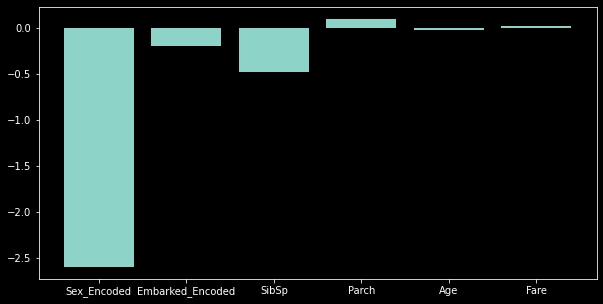

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
acc_logreg = logreg.score(X_train, y_train)*100
acc_test_logreg = logreg.score(X_test, y_test)*100
print("Accuracy on Training Set: {:.2f}".format(acc_logreg))
print("Accuracy on Test Set: {:.2f}".format(acc_test_logreg))

print("\n# ------- Feature Importance -------- #")
importance = logreg.coef_[0]
for idx, val in enumerate(importance):
    col_name = X.iloc[:, idx].name
    print("Feature: {}, Score: {}".format(col_name, val))
    
plt.subplots(figsize=(10, 5))
_ = plt.bar([X.iloc[:, x].name for x in range(len(importance))], importance)

#### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
acc_tree = tree.score(X_train, y_train)*100
acc_test_tree = tree.score(X_test, y_test)*100


print("Accuracy on Training Set: {:.2f}".format(acc_tree))
print("Accuracy on Test Set: {:.2f}".format(acc_test_tree))

Accuracy on Training Set: 84.30
Accuracy on Test Set: 76.83


#### Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
_ = reg.fit(X_poly, y_train)

acc_poly = reg.score(X_poly, y_train)*100
# acc_test_poly = reg.score(X_train, poly_reg.transform(X_test))*100

print("Accuracy on Training Set: {:.2f}".format(acc_poly))
# print("Accuracy on Training Set: {:.2f}".format(acc_test_poly))

Accuracy on Training Set: 60.73


#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, max_depth=4, max_features=6, n_jobs=-1, max_leaf_nodes=5).fit(X_train, y_train)

acc_forest = forest.score(X_train, y_train)*100
acc_test_forest = forest.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_forest))
print("Accuracy on Test Set: {:.2f}".format(acc_test_forest))

Accuracy on Training Set: 82.62
Accuracy on Test Set: 75.00


#### Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(criterion = "friedman_mse", 
                                      learning_rate = 0.15, 
                                      loss = "deviance", 
                                      max_depth = 5, 
                                      max_features = "sqrt", 
                                      min_samples_leaf = 0.1, 
                                      min_samples_split = 0.2090909090909091, 
                                      n_estimators = 10, 
                                      subsample = 0.8).fit(X, y)

acc_gradient = gradient.score(X_train, y_train)*100
acc_test_gradient = gradient.score(X_test, y_test)*100
kfold_xgb = cross_val_score(estimator = gradient, X = X, y = y, cv = 10)
kfold_xgb_mean = round(kfold_xgb.mean() * 100, 2)

print("Accuracy on Training Set: {:.2f}".format(acc_gradient))
print("Accuracy on Test Set: {:.2f}".format(acc_test_gradient))
print("k-Fold Score: {:.2f}".format(kfold_xgb_mean))

Accuracy on Training Set: 80.34
Accuracy on Test Set: 75.00
k-Fold Score: 77.32


#### K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

acc_knn = knn.score(X_train, y_train)*100
acc_test_knn = knn.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_knn))
print("Accuracy on Test Set: {:.2f}".format(acc_test_knn))

Accuracy on Training Set: 79.27
Accuracy on Test Set: 70.73


#### Linear SVC

In [32]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(C=4).fit(X_train, y_train)

acc_linearSVC = linear_svc.score(X_train, y_train)*100
acc_test_linearSVC = linear_svc.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_linearSVC))
print("Accuracy on Test Set: {:.2f}".format(acc_test_linearSVC))

Accuracy on Training Set: 39.63
Accuracy on Test Set: 37.80


/home/prince/Github/Kaggle Competitions/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Ridge Classifier

In [33]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier().fit(X_train, y_train)

acc_ridge = ridge.score(X_train, y_train)*100
acc_test_ridge = ridge.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_ridge))
print("Accuracy on Test Set: {:.2f}".format(acc_test_ridge))

Accuracy on Training Set: 80.34
Accuracy on Test Set: 74.39


#### Support Vector Classifier

In [34]:
from sklearn.svm import SVC
svc = SVC(C=0.01, gamma=10).fit(X_train, y_train)
acc_svc = svc.score(X_train, y_train)*100
acc_test_svc = svc.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_svc))
print("Accuracy on Test Set: {:.2f}".format(acc_test_svc))

Accuracy on Training Set: 60.37
Accuracy on Test Set: 63.41


#### XGBoost Classifier

In [35]:
from xgboost import XGBClassifier

xg = XGBClassifier(min_child_weight=5, 
                   max_depth=15, 
                   learning_rate=0.15, 
                   gamma=0.4, 
                   colsample_bytree=0.7).fit(X_train, y_train)

acc_xg = xg.score(X_train, y_train)*100
acc_test_xg = xg.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_xg))
print("Accuracy on Test Set: {:.2f}".format(acc_test_xg))

[02:19:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/prince/Github/Kaggle Competitions/venv/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy on Training Set: 89.63
Accuracy on Test Set: 79.88


### Hyperparameter Tuning

In [36]:
cv_split = ShuffleSplit(n_splits = 10, 
                        test_size = .3, 
                        train_size = .6, 
                        random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#### XGBoost

In [37]:
from xgboost import XGBClassifier

# Hyper Parameter Optimization
params={
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

random_search = RandomizedSearchCV(estimator = XGBClassifier(),
                                 param_distributions = params,
                                 scoring = "roc_auc",
                                 cv = cv_split,
                                 n_jobs = -1,
                                 verbose = 2
                                )
random_search.fit(X, y)
best_accuracy = random_search.best_score_
best_params = random_search.best_params_
print("Best Accuracy: {:.2f}".format(best_accuracy*100))
print("Best Parameters:", best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[02:22:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy: 85.44
Best Parameters: {'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.7}


/home/prince/Github/Kaggle Competitions/venv/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


##### Gradient Boosting

In [42]:
# Hyper Parameter Optimization
parameters = {
    "loss"               : ["deviance"],
    "learning_rate"      : [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split"  : np.linspace(0.1, 0.5, 12),
    "min_samples_leaf"   : np.linspace(0.1, 0.5, 12),
    "max_depth"          : [3,5,8],
    "max_features"       : ["log2","sqrt"],
    "criterion"          : ["friedman_mse",  "mae"],
    "subsample"          : [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators"       : [10]
}

grid_search = GridSearchCV(estimator = gradient,
                           param_grid = parameters,
                           cv = 5,
                           scoring = "accuracy",
                           n_jobs = -1,
                           verbose = 2
                          )
grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
print("Best Accuracy: {:.2f}".format(best_accuracy*100))
print("Best Parameters:", best_params)

Fitting 5 folds for each of 84672 candidates, totalling 423360 fits
Best Accuracy: 80.19
Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.15, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.2090909090909091, 'n_estimators': 10, 'subsample': 0.8}


The above cell took 21 Minutes adn 30 Seconds to execute!

In [56]:
# Hyper Parameter Optimization
parameters = {
    "loss"               : ["deviance"],
    "learning_rate"      : [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split"  : np.linspace(0.1, 0.5, 12),
    "min_samples_leaf"   : np.linspace(0.1, 0.5, 12),
    "max_depth"          : [1, 2, 3, 4, 5, 6, 7, 8],
    "max_features"       : ["log2","sqrt"],
    "criterion"          : ["friedman_mse",  "mae"],
    "subsample"          : [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators"       : [5, 10, 15, 20, 25, 30, 35, 40]
}

random_search = RandomizedSearchCV(estimator = gradient,
                                   param_distributions = parameters,
                                   cv = cv_split,
                                   scoring = "roc_auc",
                                   n_jobs = -1,
                                   verbose = 2
                                  )
random_search.fit(X, y)
best_accuracy = random_search.best_score_
best_params = random_search.best_params_
print("Best Accuracy: {:.2f}".format(best_accuracy*100))
print("Best Parameters:", best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Accuracy: 84.99
Best Parameters: {'subsample': 0.85, 'n_estimators': 40, 'min_samples_split': 0.31818181818181823, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 8, 'loss': 'deviance', 'learning_rate': 0.075, 'criterion': 'mae'}


/home/prince/Github/Kaggle Competitions/venv/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'mse' instead, as trees should use a least-square criterion in Gradient Boosting.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


This one only took 1.94 Seconds to execute as compared to GridSearchCV

### Score Metrics

In [38]:
models = pd.DataFrame({
    'Model': ['Support Vector Classifier', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Linear SVC', 'Decision Tree', "Ridge Regression", "Polynomial Regression", "Gradient Boosting Classifier", "XGBoost Classifer"],
    'Test Score': [acc_test_svc, acc_test_knn, acc_test_logreg, acc_test_forest, acc_test_linearSVC, acc_test_tree, acc_test_ridge, np.nan, acc_test_gradient, acc_test_xg],
    'Train Score': [acc_svc, acc_knn, acc_logreg, acc_forest, acc_linearSVC, acc_tree, acc_ridge, acc_poly, acc_gradient, acc_xg]
                     })
sorted_models = models.sort_values(by="Test Score", ascending=False).reset_index(drop=True)

In [39]:
sorted_models

,Model,Test Score,Train Score
0,XGBoost Classifer,79.88,89.63
1,Decision Tree,76.83,84.30
2,Logistic Regression,75.61,79.88
3,Random Forest,75.00,82.62
4,Gradient Boosting Classifier,75.00,80.34
5,Ridge Regression,74.39,80.34
6,KNN,70.73,79.27
7,Support Vector Classifier,63.41,60.37
8,Linear SVC,37.80,39.63
9,Polynomial Regression,NaN,60.73


### Submission Predictions

In [40]:
predictions = random_search.predict(test_data[calc_titanic])

In [41]:
output = pd.DataFrame({'PassengerId': test_data["PassengerId"], 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Visualizing Decision Tree

In [42]:
from sklearn.tree import export_graphviz
feature_names=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']
export_graphviz(tree, out_file="tree.dot", class_names=["Dead", "Alive"], feature_names=X_train.columns, impurity=False, filled=True)

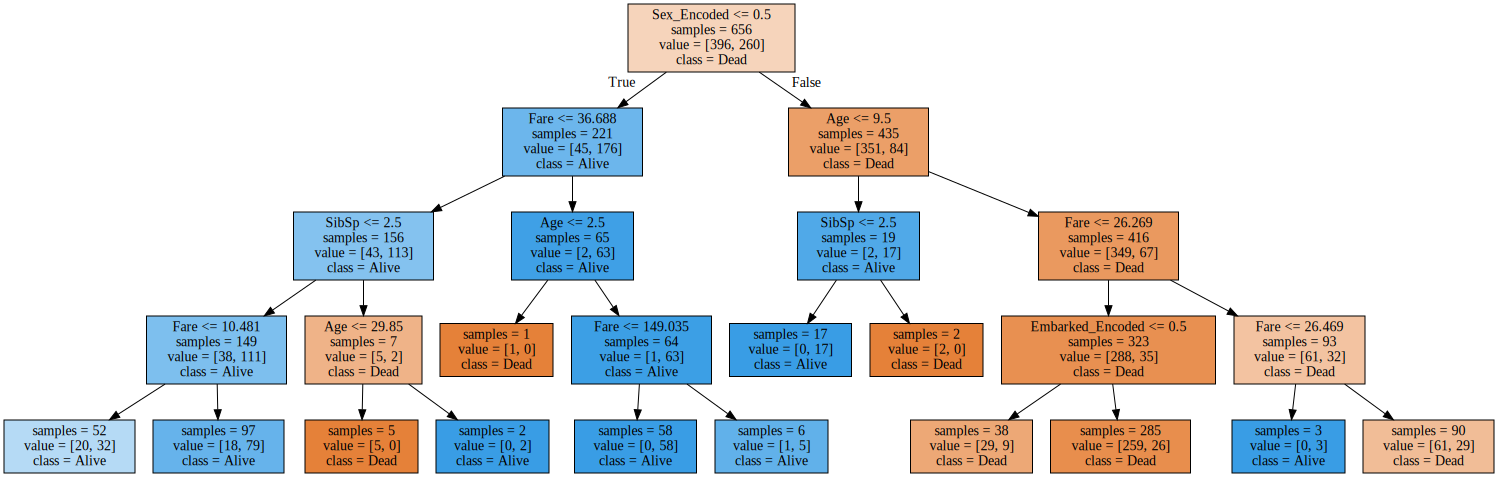

In [43]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [44]:
def plot_feature_importance(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Names")

In [45]:
# plot_feature_importance(tree)

## Visualizing Random Forest

In [46]:
# plot_feature_importance(forest)

## Visualizing Gradient Boosting

In [47]:
# plot_feature_importance(gradient)